### Contrôle Continu - LU2PY222 : Modélisation Numérique en Physique
#### 5 mars 2025, 10h45 - 12h45

Vous rendrez sur Moodle un **compte-rendu** sous la forme d'un calepin **Jupyter** comprenant :
- vos codes python (bien commentés)
- vos graphiques (axes nommés et courbes légendées lorsque c'est nécessaire)
- les commentaires des résultats sous format Markdown lorsque c'est demandé

Vous avez le droit d'accéder à tous les calepins jupyter présents sur votre Hub, ainsi qu'à vos notes (manuscrites ou numériques) prises pendant les séances de travail de cette UE. L'accès à internet est limité aux sites de documentation **python**, **numpy** et **matplotlib**, et à Moodle. Vos documents numériques doivent être présents dans vos fichiers personnels Moodle. Les clés USB, smartphones et tablettes ne sont pas acceptées.

# Particule dans un cyclotron

Un cyclotron comporte trois parties, voir la figure ci-dessous. Les parties supérieure et inférieure, appelées "D" à cause de la forme de la trajectoire, sont plongées dans un champ magnétique.

![](Figure3.png)

Au temps $t_0=0$ **(ici le temps est sans unité)**, un proton est injecté au niveau du D inférieur sans vitesse. Une tension alternative est appliquée entre les D. Elle crée un champ électrique dont la direction et le sens sont toujours **similaires** à ceux de la vitesse du proton lorsqu’il est entre les D. Les instants $t_n$ où le proton sort des D (soit inférieur, soit supérieur, voir la figure) sont donnés, **sans unité**, par
$$t_n=n+\tau \sqrt{n}.$$
On choisit $\tau=0.5$. Le temps passé par le proton dans un D (supérieur ou inférieur) est toujours de $1$.
La trajectoire du proton est plane. On s’intéresse à sa vitesse. Ses composantes sont données, dans un repère et des unités appropriés, **en fonction de sa position dans le cyclotron:**
1) Pour $t$ variant de $t_n$ à $t_{n+1}-1$ c’est-à-dire quand il est entre les D :
$$
v_x(t) = 0  \qquad  v_y(t) = \epsilon_n \left( \sqrt{n} + (t-t_n)/\tau \right)
$$
2) Pour $t$ variant de $t_{n+1}-1$ à $t_{n+1}$ c’est-à-dire quand il est dans D supérieur ou D inférieur.
$$
v_x(t) = \epsilon_n \sqrt{n+1} \sin \left( \pi (t-t_{n+1}) \right) \qquad v_y(t) = -\epsilon_n \sqrt{n+1} \cos \left( \pi (t-t_{n+1}) \right)
$$

Dans ces expressions, $\epsilon_n$ vaut $1$ pour $n$ pair et $-1$ pour $n$ impair. On pourra prendre $\epsilon_n = (-1)^n$.

## Partie I

1. Créer un tableau contenant les instants de sortie des boucles "D" : $t_0$, $t_1$, ... jusqu'à $t_{50}$ inclus. 
2. Vérifier que $t_1=1.5$, $t_4=5$, $t_9=10.5$, $t_{16}=18$, et $t_{25}=27.5$ avec des opérateurs booléens.
3. Calculer les valeurs de $v_x$ et $v_y$ en fonction du temps pour $t$ variant de $t_2−1$ à $t_2$. Vous utiliserez un échantillonage suffisant pour le temps $t$, dans un tableau distinct de celui de la question précédente. Faire de même pour $t$ variant de $t_4-1$ à $t_4$. 
4. Représenter dans un graphique $v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $t_2-1$ a $t_2$. Faire de même pour $t$ variant de $t_4-1$ à $t_4$.
5. Déterminer des valeurs approchées des maxima de $v_x$ et $v_y$ pour $t$ variant de $t_2-1$ à $t_2$, ainsi que les instants $t$ correspondants. Un maximum peut être en bord d'intervalle. Faire de même pour $t$ variant de $t_4-1$ à $t_4$. Commenter.

1. Créer un tableau contenant les instants de sortie des boucles "D" : $t_0$, $t_1$, ... jusqu'à $t_{50}$ inclus. 

In [147]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [148]:
# Initialisation d'une tableau numpy pour t est du paramètre tau
t = np.zeros(51)
tau = 0.5

for n in range(len(t)):
    t[n] = n + tau * np.sqrt(n)

2. Vérifier que $t_1=1.5$, $t_4=5$, $t_9=10.5$, $t_{16}=18$, et $t_{25}=27.5$ avec des opérateurs booléens.

In [149]:
delta = 0.005

bool1 = np.abs(t[1] - 1.5) < delta
bool2 = np.abs(t[4] - 5) < delta
bool3 = np.abs(t[9] - 10.5) < delta
bool4 = np.abs(t[16] - 18) < delta
bool5 = np.abs(t[25] - 27.5) < delta

print(f"t_1 = 1.5 : {bool1}")
print(f"t_4 = 5 : {bool2}")
print(f"t_9 = 10.5 : {bool3}")
print(f"t_{16} = 18 : {bool4}")
print(f"t_{25} = 27.5 : {bool5}")

t_1 = 1.5 : True
t_4 = 5 : True
t_9 = 10.5 : True
t_16 = 18 : True
t_25 = 27.5 : True


3. Calculer les valeurs de $v_x$ et $v_y$ en fonction du temps pour $t$ variant de $t_2−1$ à $t_2$. Vous utiliserez un échantillonage suffisant pour le temps $t$, dans un tableau distinct de celui de la question précédente. Faire de même pour $t$ variant de $t_4-1$ à $t_4$. 


In [150]:
# Initialisation
N = 1000
t2 = np.linspace(t[2]-1, t[2], N)
t4 = np.linspace(t[4]-1, t[4], N)

# Création des fonctions pour calculer vx et vy

def vx(n, ti, N):
    """ Retourne une tableau numpy des vx pour t variant de t_{n+1}-1 à t_{n+1}"""
    # On crée un tableau vide à remplir avec les valeurs de vx
    vx = np.zeros(N) 
    eps = (-1)**n
    # On applique la formule donnée dans l'énoncé avec un boucle
    for i in range(N):
        vx[i] = eps * np.sqrt(n + 1) * np.sin(np.pi * (ti[i] - ti[-1]))
    return vx

def vy(n, ti, N):
    """ Retourne une tableau numpy des vy pour t variant de t_{n+1}-1 à t_{n+1}"""
    # On crée un tableau vide à remplir avec les valeurs de vy
    vy = np.zeros(N)
    eps = (-1)**n
    # On applique la formule donnée dans l'énoncé avec un boucle
    for i in range(N):
        vy[i] = -eps * np.sqrt(n + 1) * np.cos(np.pi * (ti[i] - ti[-1]))
    return vy

vx2 = vx(1, t2, N)
vy2 = vy(1, t2, N)

vx4 = vx(3, t4, N)
vy4 = vy(3, t4, N)

4. Représenter dans un graphique $v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $t_2-1$ a $t_2$. Faire de même pour $t$ variant de $t_4-1$ à $t_4$.

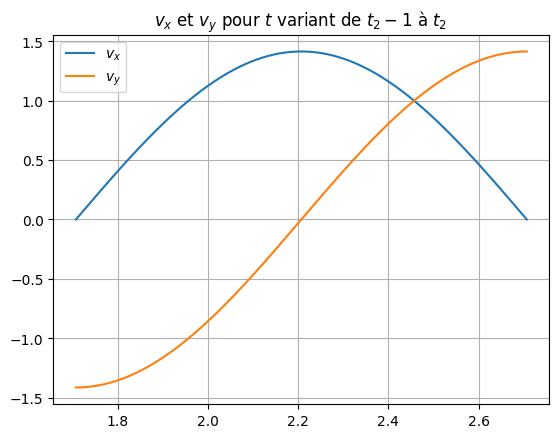

In [151]:
plt.plot(t2, vx2, label = "$v_x$")
plt.plot(t2, vy2, label = "$v_y$")
plt.legend()
plt.grid()
plt.title("$v_x$ et $v_y$ pour $t$ variant de $t_2-1$ à $t_2$ ")
plt.show()

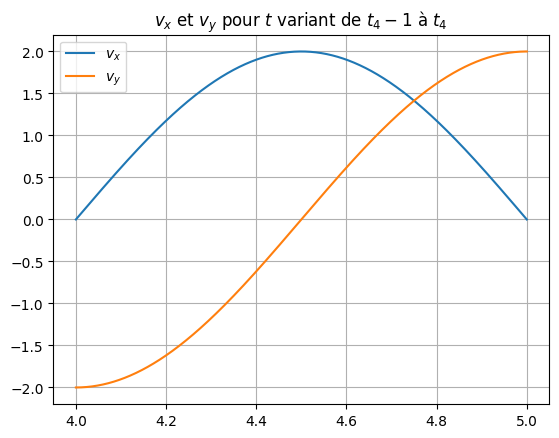

In [152]:
plt.plot(t4, vx4, label = "$v_x$")
plt.plot(t4, vy4, label = "$v_y$")
plt.legend()
plt.grid()
plt.title("$v_x$ et $v_y$ pour $t$ variant de $t_4-1$ à $t_4$ ")
plt.show()

5. Déterminer des valeurs approchées des maxima de $v_x$ et $v_y$ pour $t$ variant de $t_2-1$ à $t_2$, ainsi que les instants $t$ correspondants. Un maximum peut être en bord d'intervalle. Faire de même pour $t$ variant de $t_4-1$ à $t_4$. Commenter.

In [160]:
# Les maxima de vx et vy
vx2max = max(vx2)
vy2max = max(vy2)
vx4max = max(vx4)
vy4max = max(vy4)

# Création d'une fonction pour trouver les instants t correspondants 
def trouve_t(vmax, v, t):
    """ Trouve l'instant correspondant à une vitesse donnée"""
    for i in range(len(v)):
        if v[i] == vmax:
            return t[i] 

tx2max = trouve_t(vx2max, vx2, t2)
ty2max = trouve_t(vy2max, vy2, t2)
tx4max = trouve_t(vx4max, vx4, t4)
ty4max = trouve_t(vy4max, vy4, t4)

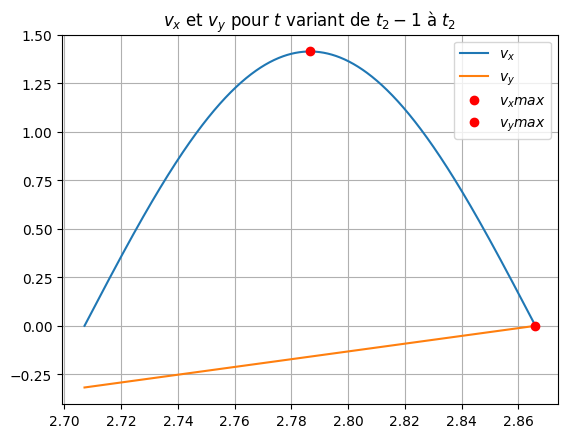

In [161]:
plt.plot(t2, vx2, label = "$v_x$")
plt.plot(t2, vy2, label = "$v_y$")
plt.plot(tx2max, vx2max, 'or', label = "$v_x max$")
plt.plot(ty2max, vy2max, 'or', label = "$v_y max$")
plt.legend()
plt.grid()
plt.title("$v_x$ et $v_y$ pour $t$ variant de $t_2-1$ à $t_2$ ")
plt.show()

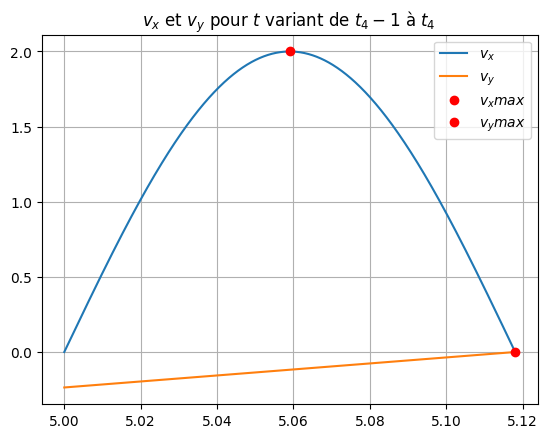

In [162]:
plt.plot(t4, vx4, label = "$v_x$")
plt.plot(t4, vy4, label = "$v_y$")
plt.plot(tx4max, vx4max, 'or', label = "$v_x max$")
plt.plot(ty4max, vy4max, 'or', label = "$v_y max$")
plt.legend()
plt.grid()
plt.title("$v_x$ et $v_y$ pour $t$ variant de $t_4-1$ à $t_4$ ")
plt.show()

In [163]:
print(f"Les valeurs approchées des maxima de v_x et v_y pour t variant de t_2-1 à t_2")
print(f"v_xmax = {vx2max:.3f} ; t_vxmax = {tx2max:.3f}")
print(f"v_ymax = {vy2max:.3f} ; t_vymax = {ty2max:.3f}")
print(f"Les valeurs approchées des maxima de v_x et v_y pour t variant de t_4-1 à t_4")
print(f"v_xmax = {vx4max:.3f} ; t_vxmax = {tx4max:.3f}")
print(f"v_ymax = {vy4max:.3f} ; t_vymax = {ty4max:.3f}")

Les valeurs approchées des maxima de v_x et v_y pour t variant de t_2-1 à t_2
v_xmax = 1.414 ; t_vxmax = 2.786
v_ymax = 0.000 ; t_vymax = 2.866
Les valeurs approchées des maxima de v_x et v_y pour t variant de t_4-1 à t_4
v_xmax = 2.000 ; t_vxmax = 5.059
v_ymax = 0.000 ; t_vymax = 5.118


Les maxima correspondent bien à ce qu'on a pu conclure des formules données dans l'énoncé. Les instants des t correspondent bien aux maxima. On voit que les vitesses maximales sont plus grandes pour $t$ variant de $t_4-1$ à $t_4$, ce qui est logique parce que le particule doit parcourir une distance plus grande dans la même intervalle de temps.

## Partie II
6. Représenter $v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $0$ à $t_6$. On utilisera une couleur unique pour la courbe par morceaux. On remarque que $v_x$ et $v_y$ sont des fonctions continues du temps $t$. Commenter.
7. Représenter le module de la vitesse $\sqrt{v_x^2+v_y^2}$ en fonction de $t$ pour $t$ variant de $0$ à $t_6$. On utilisera une couleur unique pour la courbe par morceaux. Commenter. A quoi sert un cyclotron ?
8. Pour $n$ variant de $0$ à $50$, représenter le module de la vitesse $\sqrt{v_x(t_n)^2+v_y(t_n)^2}$ en fonction de $t_n-n$, qui est le temps total passé par le proton entre les D à l'instant $t_n$. Commenter.

1) Pour $t$ variant de $t_n$ à $t_{n+1}-1$ c’est-à-dire quand il est entre les D :
$$
v_x(t) = 0  \qquad  v_y(t) = \epsilon_n \left( \sqrt{n} + (t-t_n)/\tau \right)
$$
2) Pour $t$ variant de $t_{n+1}-1$ à $t_{n+1}$ c’est-à-dire quand il est dans D supérieur ou D inférieur.
$$
v_x(t) = \epsilon_n \sqrt{n+1} \sin \left( \pi (t-t_{n+1}) \right) \qquad v_y(t) = -\epsilon_n \sqrt{n+1} \cos \left( \pi (t-t_{n+1}) \right)
$$

Dans ces expressions, $\epsilon_n$ vaut $1$ pour $n$ pair et $-1$ pour $n$ impair. On pourra prendre $\epsilon_n = (-1)^n$.

In [172]:
# Initialisation d'une tableau numpy pour t est du paramètre tau
tn = np.zeros(51)
tau = 0.5

for n in range(len(t)):
    tn[n] = n + tau * np.sqrt(n)
t1 = np.linspace(t[0], t[6], N)
def v(t):
    
    vx = np.zeros(N)
    vy = np.zeros(N)
    for i in range(N):
        if t[i] <= t[1]:
            n = 0
        elif t[i] > tn[1] and t[i] <= tn[2]:
            n = 1
        elif t[i] > tn[2] and t[i] <= tn[3]:
            n = 2
        elif t[i] > tn[3] and t[i] <= tn[4]:
            n = 3
        elif t[i] > tn[4] and t[i] <= tn[5]:
            n = 4
        else:
            n = 5
        eps = (-1)**n
        if t[i] >= tn[n] and t[i] < (tn[n+1] - 1):
            vx[i] = 0
            vy[i] = eps * (np.sqrt(n) + ( t[i] - tn[n+1])/tau)
        elif t[i] >= (tn[n+1] - 1) and t[i] < tn[n+1]:
            vx[i] = eps * np.sqrt(n + 1) * np.sin(np.pi * (ti[i] - ti[-1]))
            vy[i] = -eps * np.sqrt(n + 1) * np.cos(np.pi * (ti[i] - ti[-1]))
    return [vx, vy]
l = v(t)

IndexError: index 51 is out of bounds for axis 0 with size 51

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

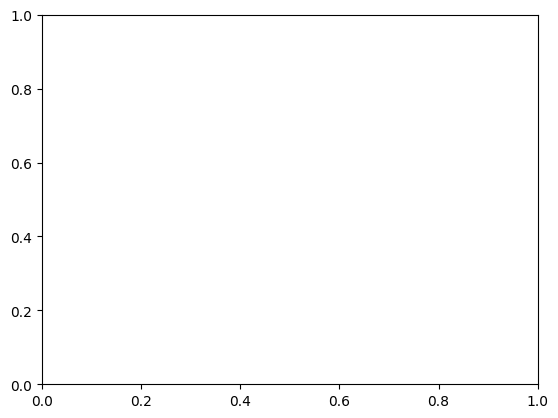

In [173]:
plt.plot(t0, vx, label = "$v_x$")
plt.plot(t0, vy0, label = "$v_y$")
plt.plot(t1D, vx1D, label = "$v_x$")
plt.plot(t1D, vy1D, label = "$v_y$")
plt.legend()
plt.grid()
plt.title("$v_x$ et $v_y$ pour $t$ variant de $t_2-1$ à $t_2$ ")
plt.show()